import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Problem 1 : $\epsilon$-greedy & Softmax
Consider a 3-armed bandit
The reward functions are as follows:
1. arm1 : N(1, 0.5)
2. arm2 : N(0, 1)
3. arm3 : N(-2, 10)

Run the box below to see the reward functions

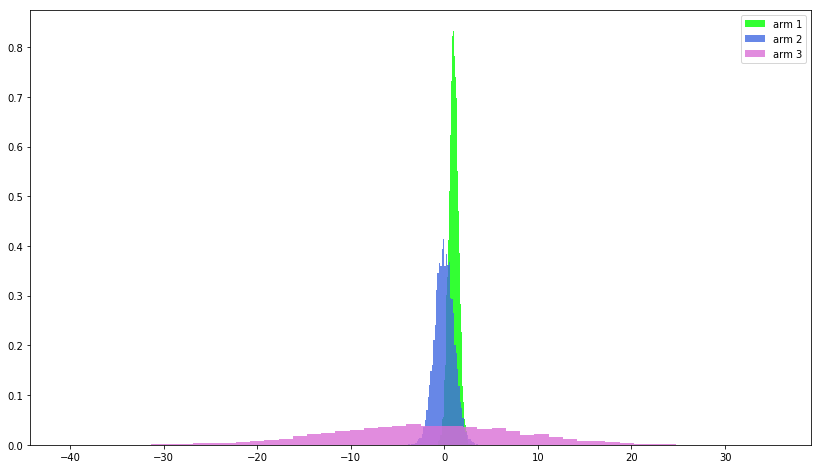

In [30]:
# Reward Distributions
arms_count = 3
mus = [1.0, 0.0, -2.0]
sigmas = [0.5, 1.0, 10.0]
colors = ['lime', 'royalblue', 'orchid']
sample_size = 10000
bins = 50

plt.figure(figsize=(14,8))
for mu, sigma, idx, color in zip(mus, sigmas, np.arange(arms_count), colors):
    sample = np.random.normal(mu, sigma, sample_size)
    plt.hist(sample, bins=bins, density=True, alpha=0.8, label=f'arm {idx+1}', color=color)
plt.legend()
plt.show()

### The play() function accepts an arm as input and returns the reward of playing that arm. Play the game for several trials with different arms to get a feeling of rewards.

In [31]:
def play(arm):
    reward = np.random.normal(mus[arm], sigmas[arm], 1)
#     print(f'Your move : arm {arm}  ******* Your reward : {reward[0]}')
    return reward

In [8]:
play(2)

Your move : arm 2  ******* Your reward : 1.6901959357167624


array([1.69019594])

### Train an agent for 1000 trials using $\epsilon$-greedy policy with $\epsilon \in \{ 0.5, 0.7, 0.9 \}$ and plot the average reward against trials

Text(0, 0.5, 'Average rewar in e_greedy with epsilon=0.5')

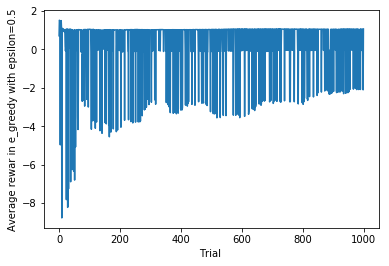

In [41]:
import random
import seaborn as sns
import matplotlib.pyplot as plt

def e_greedy(epsilon):
    count = [0,0,0]
    Q = [0,0,0]
    Q1=[]
    p = [1/3,1/3,1/3]
    for i in range(1000):
        randomNum = random.randint(1,10)/10
        if(randomNum > epsilon):
            m = max(Q)
            arm = Q.index(m)
        else:
            arm = random.randint(0,2)
        count[arm]=count[arm]+1
        reward = play(arm)
        alpha = 1/(count[arm])
        Q[arm] = Q[arm] + alpha*(reward - Q[arm])
        Q1.append(Q[arm])
#         if(arm==0):
#             Q1.append(Q[arm])
#         elif(arm==1):
#             Q2.append(Q[arm])
#         elif(arm==2):
#             Q3.append(Q[arm])
    return Q,Q1

Q1,QQ1=e_greedy(0.5)
plt.plot(QQ1)
plt.xlabel("Trial ")
plt.ylabel("Average rewar in e_greedy with epsilon=0.5")
# plt.show()



 

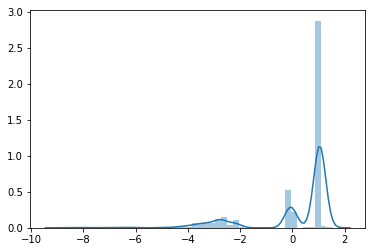

In [42]:
sns.distplot(QQ1);


Text(0, 0.5, 'Average rewar in e_greedy with epsilon=0.7')

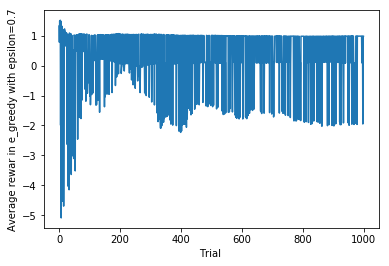

In [48]:
Q2,QQ2 = e_greedy(0.7)
plt.plot(QQ2)
plt.xlabel("Trial ")
plt.ylabel("Average rewar in e_greedy with epsilon=0.7")


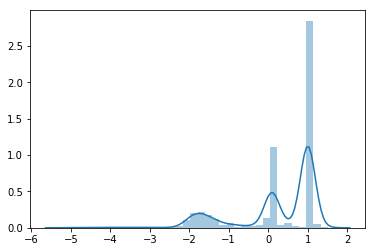

In [49]:
sns.distplot(QQ2);

Text(0, 0.5, 'Average rewar in e_greedy with epsilon=0.9')

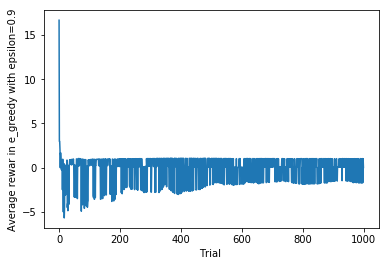

In [50]:
Q3,QQ3 = e_greedy(0.9)
plt.plot(QQ3)
plt.xlabel("Trial ")
plt.ylabel("Average rewar in e_greedy with epsilon=0.9")


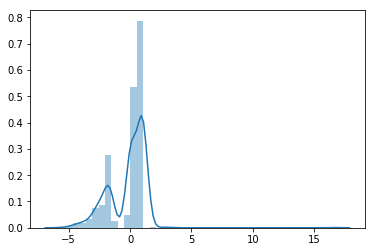

In [51]:
sns.distplot(QQ3);

### Train an agent using Softmax policy and plot the average reward against trials

Text(0, 0.5, 'Average rewar in softmax')

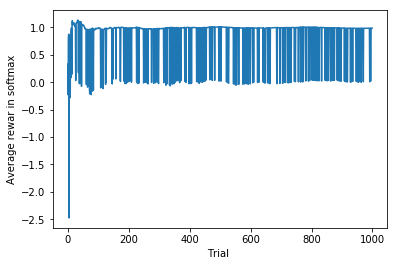

In [53]:
import math
def softmax():
    Q = [0,0,0]
    Q1 = []
    p = [1/3,1/3,1/3]
    count = [0,0,0]
    for i in range(1000):
        for i in range(3):
            p[i] = (math.exp(Q[i]))/(math.exp(Q[0]) + math.exp(Q[1]) + math.exp(Q[2]))
#             print("P:",p)
        randomNum = random.randint(1,10)/10
#         print(randomNum)

        mini = min(p)
        minInd = p.index(mini)
        maxi = max(p)
        maxInd = p.index(maxi)
        for i in range(3):
            if(i!=minInd and i!=maxInd):
                mid = p[i]
                midInd = i
        if(randomNum < mini):
#             print(1)
            arm = minInd
        elif(mini <randomNum < mid):
            arm = midInd
#             print(2)
        else:
            arm = maxInd
#             print(3)
        count[arm]=count[arm]+1
        reward = play(arm)
        alpha = 1/(count[arm])
        Q[arm] = Q[arm] + alpha*(reward - Q[arm])
        Q1.append(Q[arm])
    return Q,Q1

BQ,BQ1 = softmax()
plt.plot(BQ1)
plt.xlabel("Trial ")
plt.ylabel("Average rewar in softmax")
        

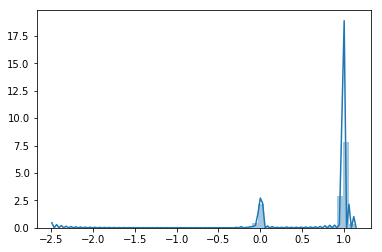

In [54]:
sns.distplot(BQ1);

# Problem 2 : UCB1
A company is running 10 different advertisement campaigns for a set of population on their webpage. 

The result of the campaign (which ad is clicked by the user in 10000 hours) had been recorded in the Ads_Optimisation.csv file.

Which campaign was the most successful?

Ads5

زیرا میانگین امتیاز بالاتری دارد و درواقع تعداد بارهایی که روی آن کلیک شده است بیشتر است 

Use UCB1 algorithm to find the answer

In [28]:
#solution 1
#using point estimator
import pandas as pd
import numpy as np
import math
#reading data from file
data=pd.read_csv('Ads_Optimisation.csv')
Ads=[]
actionCount=[0,0,0,0,0,0,0,0,0,0]
actionReward=[0,0,0,0,0,0,0,0,0,0]
Q=[0,0,0,0,0,0,0,0,0,0]
U=[0,0,0,0,0,0,0,0,0,0]
for i in range(0,10000):
    #estimating U for all arms
    for j in range(0,10):
        actionReward2= Q[j]+(1/(actionCount[j]+1))*(data.values[i,j] - Q[j])
        confidence=math.sqrt(2 * math.log(i+1)/(actionCount[j]+1))
        U[j] = actionReward2 + confidence
    
    #select arm and update Q
    arm = U.index(max(U))
    Ads.append(arm)
    actionCount[arm] += 1
    actionReward[arm] = actionReward[arm] + data.values[i,arm]
    Q[arm] = Q[arm]+(1/(actionCount[arm]))*(data.values[i,arm] - Q[arm])
# print(Ads)
print(Q)
print(actionReward)


[0.7288537549407107, 0.7199265381083568, 0.6942257217847767, 0.7175355450236967, 0.7471330275229356, 0.5610859728506788, 0.7122153209109727, 0.7355666429080533, 0.7068004459308806, 0.6739130434782603]
[922, 784, 529, 757, 1303, 124, 688, 1032, 634, 403]


# Problem 3 : Thompson Sampling
Consider the following 4-armed bandit:
    
- First arm results in a reward from N(3,25).
- Second arm results in a reward from N(15,16) with the probability of 0.7, and U(-15,10) with the probability of 0.3.
- Third arm results in a reward from U(-10,20).
- Fourth arm results in a reward from U(-5,25) with the probability of 0.6, and N(-5,25) with the probability of 0.4.

Note that you will not receive the rewards directly from the arms; instead, if the arm's reward is positive, you will get 1 as a reward; otherwise, you will receive a zero reward. Find the best arm with Thompson Sampling algorithm.
plot the total average reward that you received and the average reward of each arm. All plots should have proper labeling.

*The second parameter in normal distribution is variance not standard deviation.

[0.4444444444444444, 0.6111111111111112, 0.4166666666666667, 0.18181818181818182] [18, 36, 24, 22]


Text(0, 0.5, 'Average all reward in Thompson Sampling')

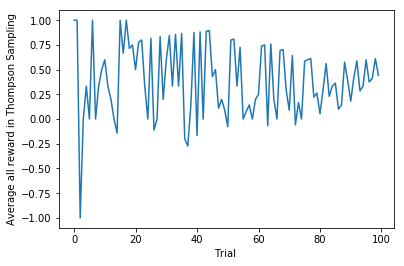

In [61]:
import numpy as np
import math

def ThompsonSampling():
    N = 4  
    alpha = [1,1,1,1]
    beta = [1,1,1,1]
    u = [0,0,0,0]
    Q = [0,0,0,0]
    count = [0,0,0,0]
    PQ = []
    PQ1 = []
    PQ2 = []
    PQ3 = []
    PQ4 = []
    for trial in range(100):
        for i in range(N): 
            u[i] = np.random.beta(alpha[i], beta[i])
        arm = u.index(max(u))
        count[arm] += 1

        if(arm == 0):
            rnd = np.random.normal(3,5)
        elif(arm == 1):
            rand2 = np.random.randint(1,10)/10
            if(rand2 < 0.3):
                rnd = np.random.uniform(-15,10)
            else:
                rnd = np.random.normal(15,4)
            
        elif(arm == 2):
            rnd = np.random.uniform(-10,20)
        elif(arm == 3):
            rand2 = np.random.randint(1,10)/10
            if(rand2 < 0.4):
                rnd = np.random.normal(-5,5)
            else:
                rnd = np.random.uniform(-5,25)
            
        if(rnd > 0):
            reward = 1
        elif(rnd < 0):
            reward = -1
        else:
            reward = 0
        Q[arm] = Q[arm] + (1/count[arm])*(reward - Q[arm]) 
        PQ.append(Q[arm])
        
        if(arm == 0):
            PQ1.append(Q[arm])
        elif(arm == 1):
            PQ2.append(Q[arm])
        elif(arm == 2):
            PQ3.append(Q[arm])
        elif(arm == 3):
            PQ4.append(Q[arm])

            
    return Q,count,PQ,PQ1,PQ2,PQ3,PQ4
Q,count,PQ,PQ1,PQ2,PQ3,PQ4 = ThompsonSampling()
print(Q,count)
plt.plot(PQ)
plt.xlabel("Trial ")
plt.ylabel("Average all reward in Thompson Sampling")


Text(0, 0.5, 'Average arm1 reward in Thompson Sampling')

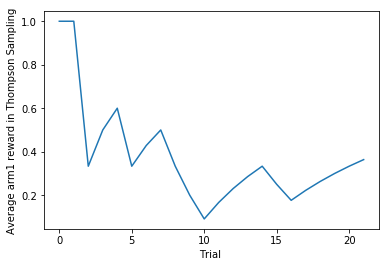

In [60]:

plt.plot(PQ1)
plt.xlabel("Trial ")
plt.ylabel("Average arm1 reward in Thompson Sampling")

Text(0, 0.5, 'Average arm2 reward in Thompson Sampling')

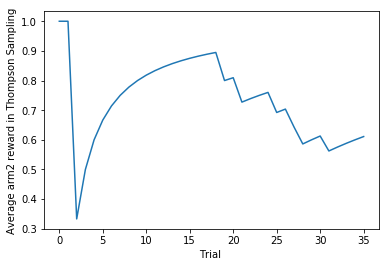

In [62]:

plt.plot(PQ2)
plt.xlabel("Trial ")
plt.ylabel("Average arm2 reward in Thompson Sampling")

Text(0, 0.5, 'Average arm3 reward in Thompson Sampling')

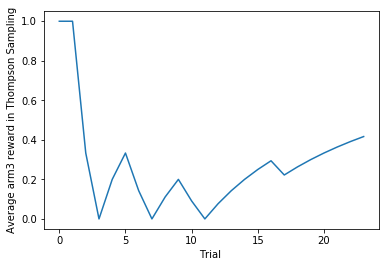

In [64]:

plt.plot(PQ3)
plt.xlabel("Trial ")
plt.ylabel("Average arm3 reward in Thompson Sampling")

Text(0, 0.5, 'Average rm4 reward in Thompson Sampling')

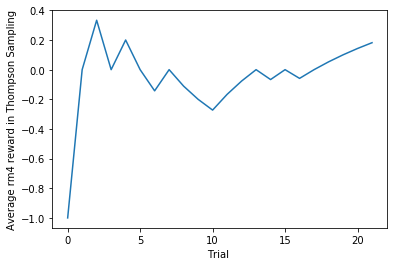

In [65]:

plt.plot(PQ4)
plt.xlabel("Trial ")
plt.ylabel("Average rm4 reward in Thompson Sampling")